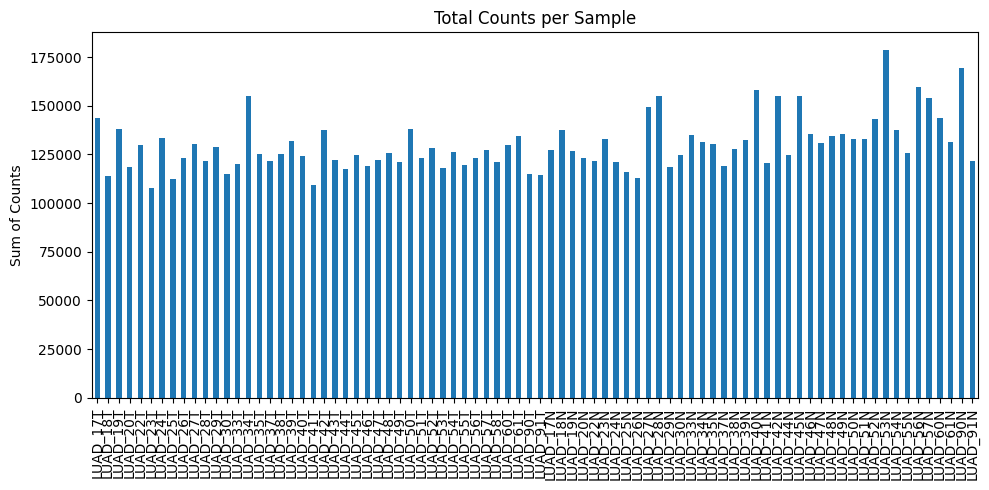

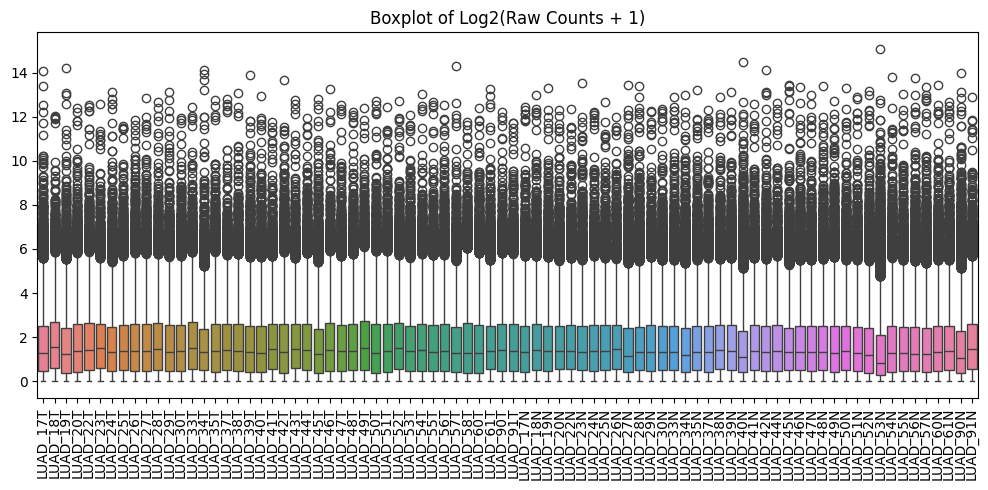

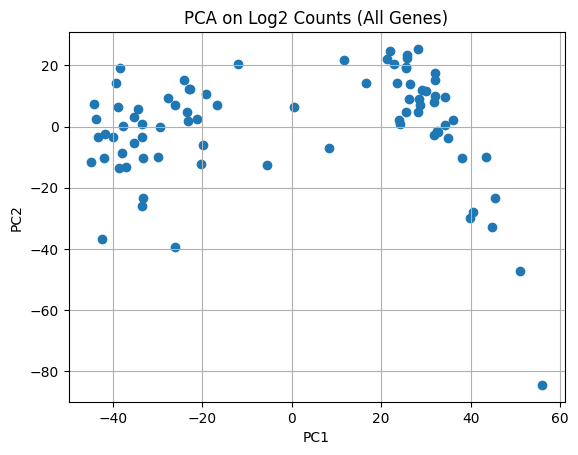

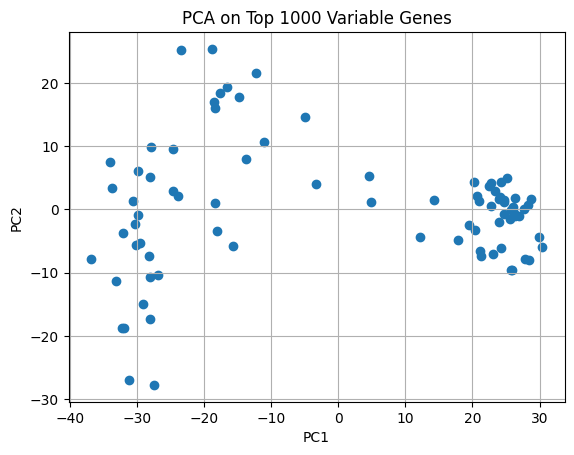

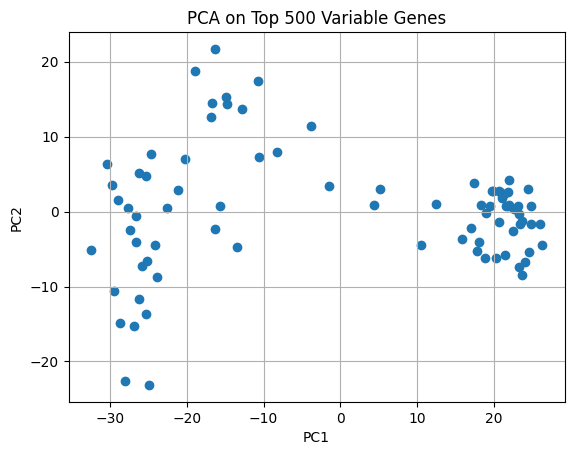

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load transcriptomics data

df = pd.read_csv("data_output/mrna_filtered.csv", index_col=0)

# Step 1: Filter genes with at least 5 counts in all samples
filtered_df = df[df.gt(5).sum(axis=1) >= 1]  # Keep genes with >5 counts in at least 1 sample

# Step 2: Histogram of total counts per sample
plt.figure(figsize=(10, 5))
df.sum().plot(kind='bar')
plt.title("Total Counts per Sample")
plt.ylabel("Sum of Counts")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 3: Boxplot of raw counts (log-transformed)
plt.figure(figsize=(10, 5))
sns.boxplot(data=np.log2(df + 1))
plt.title("Boxplot of Log2(Raw Counts + 1)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 4: PCA on full data (after log-transform)
log_df = np.log2(filtered_df + 1).dropna()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_df.T)
plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA on Log2 Counts (All Genes)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Step 5: PCA on Top 1000 and Top 500 most variable genes
def pca_most_variable(df_log, top_n):
    variances = df_log.var(axis=1)
    top_genes = variances.nlargest(top_n).index
    pca_result = PCA(n_components=2).fit_transform(df_log.loc[top_genes].T)
    plt.figure()
    plt.scatter(pca_result[:, 0], pca_result[:, 1])
    plt.title(f"PCA on Top {top_n} Variable Genes")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

pca_most_variable(log_df, 1000)
pca_most_variable(log_df, 500)


In [ ]:
###DE in r____


# Load required libraries
library(DESeq2)
library(tibble)
library(ggplot2)

# Step 1: Load count matrix
counts <- read.csv("mrna_filtered.csv", row.names = 1)

# Step 2: Basic filtering — remove genes with low counts (e.g., all ≤5)
counts <- counts[rowSums(counts > 5) >= 1, ]

# Step 3: Prepare metadata from sample names (e.g., LUAD_17T vs LUAD_17N)
sample_ids <- colnames(counts)
condition <- ifelse(grepl("T$", sample_ids), "Tumor", "Normal")
meta <- data.frame(row.names = sample_ids, condition = factor(condition))

# Step 4: DESeq2 analysis
dds <- DESeqDataSetFromMatrix(countData = round(counts), colData = meta, design = ~ condition)
dds <- DESeq(dds)
res <- results(dds, contrast = c("condition", "Tumor", "Normal"))
res <- lfcShrink(dds, coef = "condition_Tumor_vs_Normal", type = "apeglm")

# Step 5: Volcano plot
res_df <- as.data.frame(res)
res_df$gene <- rownames(res_df)
ggplot(res_df, aes(x = log2FoldChange, y = -log10(pvalue))) +
  geom_point(alpha = 0.5) +
  theme_minimal() +
  labs(title = "Volcano Plot", x = "log2 Fold Change", y = "-log10 p-value")

# Step 6: Export significant genes for DAVID (e.g., adj p < 0.05, abs logFC > 1)
sig_genes <- subset(res_df, padj < 0.05 & abs(log2FoldChange) > 1)
write.csv(sig_genes, "DEGs_for_DAVID.csv", row.names = FALSE)
write.table(sig_genes$gene, "gene_list_for_DAVID.txt", row.names = FALSE, col.names = FALSE, quote = FALSE)

# Optional: save DESeq2 object
saveRDS(dds, "dds_transcriptome.rds")


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (3871654158.py, line 7)